# Implementation from Scratch

<br />

I am going to implement algorithms by using the least kinds of libraries such as Numpy possible.

<br />

- In this case, I only implement a classification one while SVM can be used to both classification and regression.


- Karnels are important elements of SVM. At first, I will create a linear karnel.


- There are 2 margins, hard and soft margins. I am going to choose hard one this time.

## [Task 1] Create a Class of SVM Classifier

#### Steepest Descent Method by Method of Lagrange Multipliers

<br />

I prepare lagrange multipliers, $\lambda$. The number of them is the number of samples. Then I update them by using the following equation.

$$
\lambda_i^{new} = \lambda_i + \alpha(1 - \sum_{j=1}^{n}{\lambda_j y_i y_j k(x_i, x_j)})
$$

Now, $k(x_i, x_j)$ is a kernel function. The following equation is a case of a linear kernel.

$$
k(x_i, x_j) = x_{i}^{T} x_j
$$

I am going to make this part a method to handle other kinds of kernels.

<br />

In addition, I need to fulfill a condition, $\lambda_i >= 0$ per update. If the condition is not fulfilled, it becomes $\lambda_i = 0$

<br />

$i,\ j$: index of a sample

$\lambda_i^{new}$: lagrange multiplier of updated ith sample

$\lambda_i$: lagrange multiplier of pre-update ith sample

$\alpha$: learning rate

$\lambda_j$: Lagrange multiplier of jth sample

$y_i$: label of ith sample

$y_j$: label of jth sample

$x_i$: feature vector of ith sample

$x_j$: feature vector of jth sample

<br />

I will think of relationships of any single sample with all samples.

#### Decide Support Vector

<br />

I will handle a sample that is more than a threshold set by the computed Lagrange multiplier as support vector. Predicting requires the support vector.


Thresholds are hyperparameters, but it is a good start to let them about 1e-5.

#### Prediction

<br />

When predicting, I compute a feature of data that I want to predict and a feature of a support vector by using a kernel function.

<br />

The following $y(x)$ is the result of classfication.

$$
y(x) = \sum_{n=1}^{N}\lambda_n y_n k(x, s_n)
$$

$x$: feature of data that I want to predict

$N$: the number of support vectors

$n$: index of a support vector

$\lambda_n$: Lagrange multiplier of nth support vector

$y_n$: label of nth support vector

$k()$: kernel fucntion

$s_n$: feature of nth support vector

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import time
import sys

### Validate the Class

<br />

I am going to validate the class by using the iris datasets.

In [2]:
# Prepare a dataset for the validation

# Import the dataset
iris = load_iris()

# Split the datasets into explanatory and objective variables
X = iris.data[:,[1,2]]
X = X[iris.target!=1]
y = iris.target[iris.target!=1]

# Split the datasets into train and test dtasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [3]:
# Check the datasets

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (80, 2)
y_train:  (80,)
X_test:  (20, 2)
y_test:  (20,)


In [4]:
y_test

array([2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0])

In [5]:
# Standardize the dataset

# Initialize the class
scaler = StandardScaler()

# Fit the dataset
scaler.fit(X_train)

# Transfer the datasets
std_X_train = scaler.transform(X_train)

# Fit the dataset
scaler.fit(X_test)

# Transfer the datasets
std_X_test = scaler.transform(X_test)

In [6]:
# Check the standardization

std_X_train

array([[-0.44163664,  1.41052204],
       [-0.44163664,  0.55601983],
       [ 0.51974924, -0.96309519],
       [ 0.0390563 , -1.10551222],
       [-2.36440839,  0.65096452],
       [ 2.92321393, -1.01056753],
       [ 0.76009571, -1.10551222],
       [-1.64336898,  0.65096452],
       [-0.20129017, -1.01056753],
       [-0.92232957,  1.45799438],
       [ 0.51974924, -0.96309519],
       [ 0.0390563 , -1.05803988],
       [-0.44163664,  1.17316031],
       [ 0.51974924, -1.05803988],
       [ 0.0390563 ,  1.07821562],
       [ 1.72148158, -0.91562284],
       [-0.44163664,  0.88832625],
       [ 0.0390563 ,  0.79338156],
       [ 0.0390563 , -1.15298457],
       [ 1.72148158, -1.10551222],
       [ 0.27940277, -1.05803988],
       [-0.20129017, -1.01056753],
       [ 0.51974924, -1.01056753],
       [-0.44163664,  0.74590921],
       [ 0.76009571, -1.01056753],
       [ 1.48113511, -1.01056753],
       [ 1.48113511,  1.31557735],
       [-0.44163664, -0.96309519],
       [-0.44163664,

In [7]:
# Add a path searching for specific modules
sys.path.append("../scratch/model/")

# Import a class
from scratch_svm import ScratchSVMClassifier

In [8]:
# Initialize the class

svm = ScratchSVMClassifier(num_iter=1000, lr=0.00000001, threshold=0.00001)

In [9]:
# Fit

svm.fit(std_X_train, y_train, std_X_test, y_test)

time : 0.08195781707763672s


In [10]:
# Predict

svm.predict(std_X_test)

array([[ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.]])

## [Task 2] Create Polynomial Kernel Function

<br />

I will change the structure to deal with a polynomial kernel, not only a linear kernel.

<br />

Equation of Linear Kernel$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ k(x_i, x_j) = x_{i}^{T} x_j$

<br />

Equation of Polynomial Kernel$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ k(x_i, x_j) = \gamma(x_{i}^{T} x_j + \theta_0)^{d}$

<br />

$\gamma, \theta_0, d$ are hyperparameters.


A linear kernel equals to a polynomial kernel whose $\gamma=1, \theta_0=0, d=1$ respectively.

# Validation

## [Task 3] Compute Index Values

In [11]:
svm.compute_index_values(std_X_test, y_test)

accuracy score:  1.0
precision score:  1.0
recall score:  1.0
f1 score:  1.0
confusion matrix:
[[12  0]
 [ 0  8]]


## [Task 4] Visualize Decision Boundary

<br />

I will visualize the decision boundary and change the above function to visualize points of the support vectors.

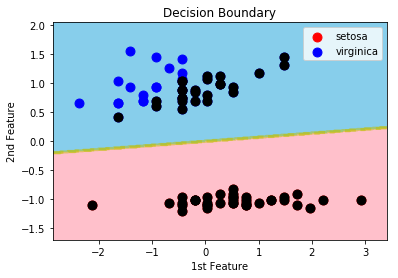

In [12]:
svm.decision_boundary(std_X_train, y_train)

## [Task 5] Time Processing

<br />

Effective implementations of SVM are required because fitting datasets by SVM wastes a lot of time. So, I time processing of the implementations and improve the algorithms. Especially, it is necessary to improve the algorithm of updating the parameters since it needs processing of loops.

# Discussion

## [Task 6] Discuss about Essencial Diffrences between Logistic Regression and SVM

    - We are able to handle both classification and regression problems by SVM while we can handle only classification problems by logistic regression.
    
    - SVM is more versatile than logistic regression because it can apply some kinds of kernels and it has 2 margins, soft and hard one.